In [66]:
from operator import mod

import numpy as np
import pandas as pd
%run feature_subset_comparison2.py
%run infoformulas_listcomp.py
import matplotlib.pyplot as plt
from math import log2
%run noise_helper_funcs.py
from random import shuffle

In [67]:
N_samples = 1000
target = 'target'

In [68]:
df_actual = pd.read_pickle("datasets/credit/credit_dataset.pickle")
df_structured = structure_data(df_actual)
all_features = [f[0] for f in df_structured.iterrows() if f[0] != target]
all_features[:3]

['checking_A11', 'checking_A12', 'checking_A13']

In [80]:
def select_random_features(features, n):
    shuffle(features)
    return features[:n]
select_random_features(all_features, 5)

['property_type_A122',
 'property_type_A121',
 'history_A33',
 'employment_years_A74',
 'purpose_A48']

In [74]:
def get_auc_scores(N_features, N_samples):
    return [np.mean(AUCComparator(df_actual,[],[],target).get_scores(select_random_features(all_features, N_features))) for i in range(N_samples)]

In [75]:
def plot_auc_scores(auc_scores, N_features, N_samples):
    mean = np.mean(auc_scores)
    std = np.std(auc_scores, axis=0)
    plt.plot(auc_scores)
    plt.hold(True)
    plt.plot([mean]*len(auc_scores))
    plt.title('AUC Scores for {} randomly selected features. {} samples'.format(N_features, N_samples))
    plt.legend(['auc scores. std: {}'.format(std), 'mean: {}'.format(mean)])

    plt.ylabel('AUC')
    fig1 = plt.gcf()
    plt.show()
    plt.hold(False)
    fig1.savefig('plots/random_features/RANDOM_FEATURES_auc-{}features_{}samples.png'.format(N_features, N_noise), dpi=100)
    print('done N_features:',N_features)

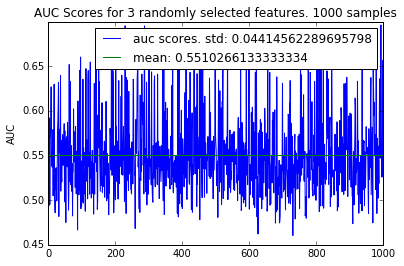

done N_features: 3
done 3


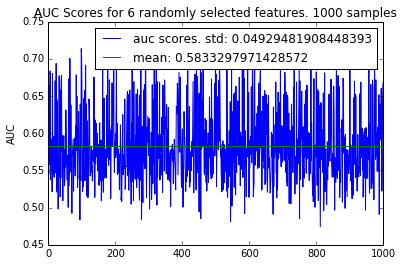

done N_features: 6
done 6


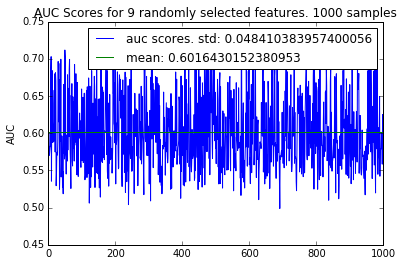

done N_features: 9
done 9


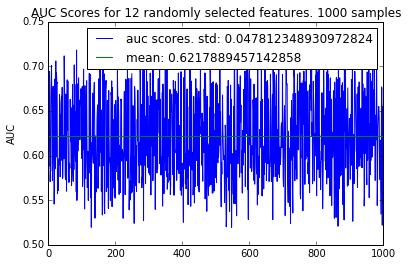

done N_features: 12
done 12


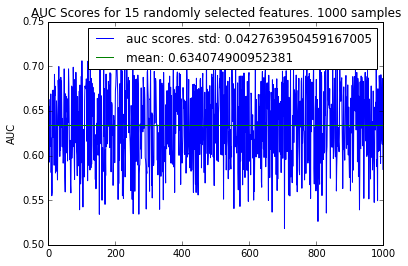

done N_features: 15
done 15


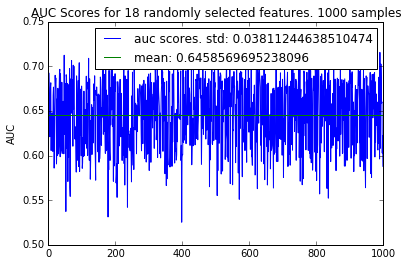

done N_features: 18
done 18


In [77]:
for n in range(3,20, 3):
    auc_scores = get_auc_scores(n, N_samples)
    plot_auc_scores(auc_scores, n, N_samples)